In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Procesamiento

In [197]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data 

In [198]:
train_path= "house-prices-advanced-regression-techniques/train.csv"

test_path = "house-prices-advanced-regression-techniques/test.csv"
df_test = pd.read_csv(train_path)

df_train = pd.read_csv(train_path)

df_train = pd.concat([df_train, df_test], axis=0, ignore_index=True)


In [199]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [200]:
df_train = df_train.drop('Id', axis=1)
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,161.291638,...,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79428.893889
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [201]:
missing_data(df_train).head(20)

,Total,Percent
PoolQC,2906,0.995205
MiscFeature,2812,0.963014
Alley,2738,0.937671
Fence,2358,0.807534
MasVnrType,1744,0.597260
FireplaceQu,1380,0.472603
LotFrontage,518,0.177397
GarageQual,162,0.055479
GarageType,162,0.055479
GarageFinish,162,0.055479


In [202]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
df_train = df_train.drop(columns=cols_to_drop)

In [203]:
cols_types =['LotFrontage','GarageQual','GarageType','GarageFinish','GarageCond','GarageYrBlt','BsmtExposure','BsmtFinType2','BsmtQual'
             ,'BsmtFinType1','BsmtCond','MasVnrArea','Electrical']

categorical_cols_NULLS = [col for col in df_train[cols_types].columns if df_train.dtypes[col] == 'object']
df_train[categorical_cols_NULLS] = df_train[categorical_cols_NULLS].fillna('Missing')


In [204]:
numerical_cols_NULLS = [col for col in df_train[cols_types].columns if df_train.dtypes[col] != 'object']
for col in numerical_cols_NULLS:
    median_value = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_value)

In [205]:
df_train = df_train.drop(columns='SalePrice')

mod temporal

In [206]:
df_train = df_train.drop(columns='LotArea')

In [207]:
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


# PCA para visualizar y modelos

In [ ]:
# Separamos numéricas y categóricas
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
        ,('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Ajuste y transformación
X_processed = preprocessor.fit_transform(df_train).toarray()

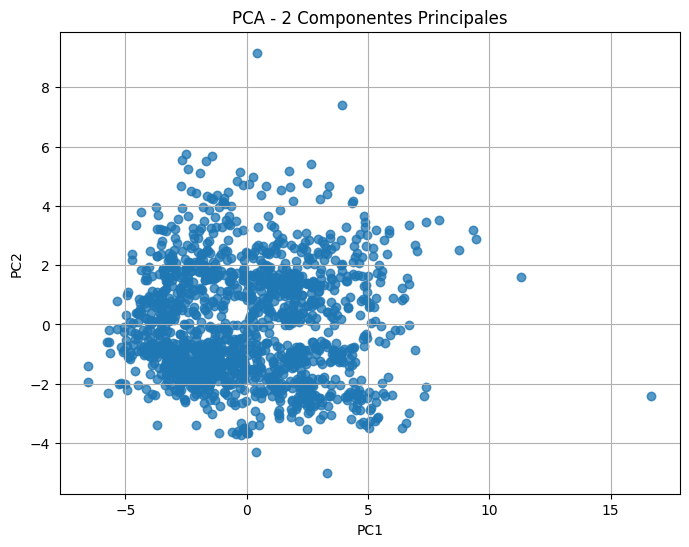

Varianza explicada por cada componente: [0.17261212 0.07490273]
Varianza total explicada (2D): 0.2475148467781485


In [ ]:

# Aplicar PCA
pca = PCA(n_components=2)  # para visualización
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)

# Graficar
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2 Componentes Principales')
plt.grid(True)
plt.show()

# Ver varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada (2D):", sum(pca.explained_variance_ratio_[:2]))

Ver cuantos componentes deberiamos tener para una mayor explicabilidad

In [210]:
pca = PCA(n_components=0.95)  # conservar el 95% de la varianza
X_pca = pca.fit_transform(X_processed)
print("Número de componentes necesarios:", X_pca.shape[1])

Número de componentes necesarios: 72


Ahora probamos Kmeans

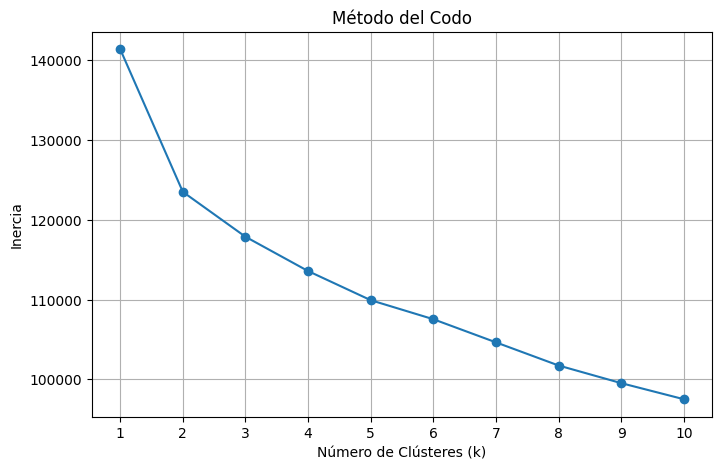

In [211]:
inertias = []
k_range = range(1, 11)  # probar k desde 1 hasta 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertias.append(kmeans.inertia_)

# Graficar la curva de la inercia
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

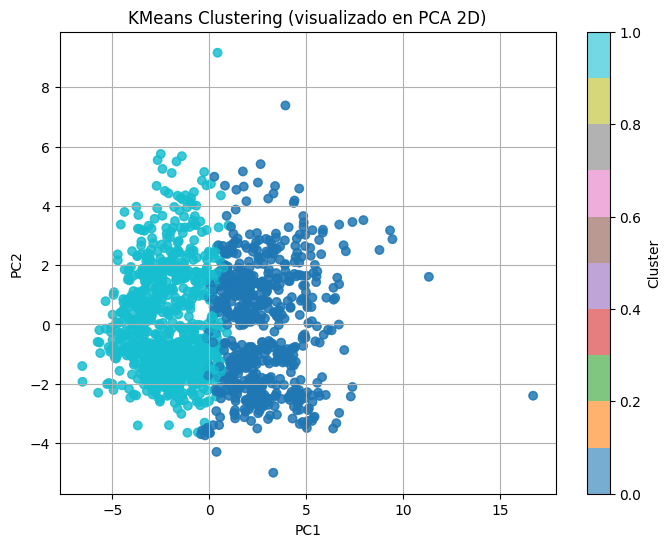

In [212]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_processed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (visualizado en PCA 2D)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [213]:
silhouette_kmeans = silhouette_score(X_processed, labels_kmeans)
db_score_kmeans = davies_bouldin_score(X_processed, labels_kmeans)

print(f"Silhouette Score (KMeans): {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Score (KMeans): {db_score_kmeans:.4f}")

Silhouette Score (KMeans): 0.1301
Davies-Bouldin Score (KMeans): 2.4793


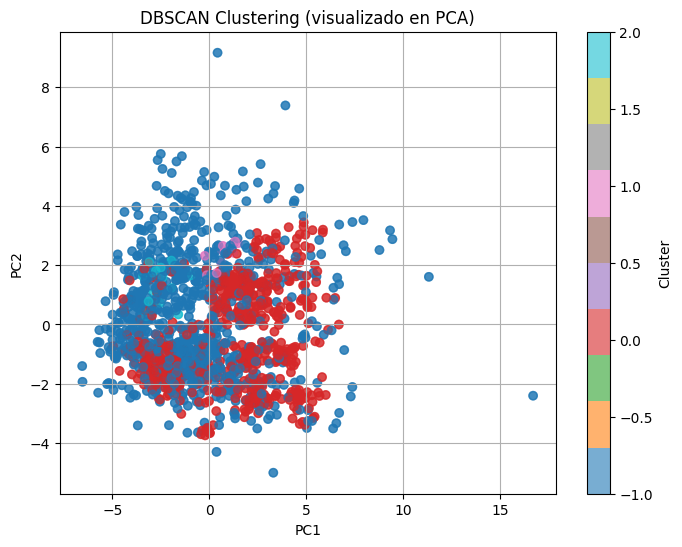

In [ ]:
X_scaled = X_processed

# Empezamos DBSCAN
dbscan = DBSCAN(eps=5, min_samples=20)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Visualizacion
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering (visualizado en PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
if len(set(labels_dbscan)) > 1 and -1 in labels_dbscan:
    sil_score = silhouette_score(X_scaled, labels_dbscan)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("No hay suficientes clústeres para calcular Silhouette Score.")

Silhouette Score: -0.0756


In [216]:
if len(set(labels_dbscan)) > 1 and -1 in labels_dbscan:
    db_score = davies_bouldin_score(X_scaled, labels_dbscan)
    print(f"Davies-Bouldin Score: {db_score:.4f}")
else:
    print("No hay suficientes clústeres para calcular Davies-Bouldin Score.")

Davies-Bouldin Score: 3.4874


Silhouette Score: 0.16459491695151637
Davies-Bouldin Score: 2.1620101621044983


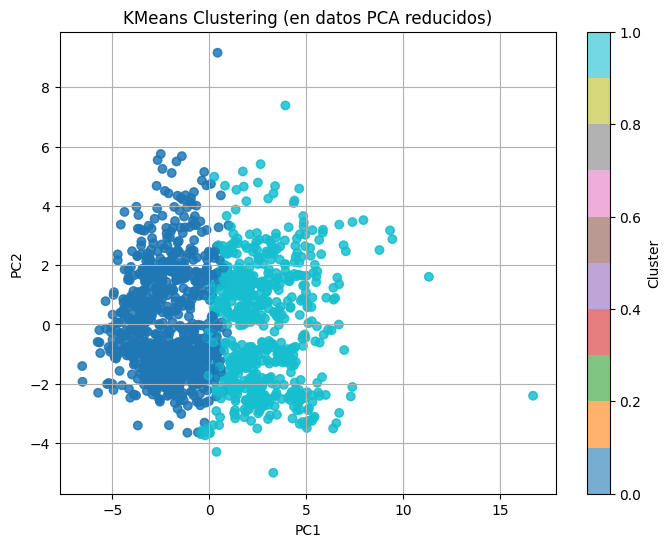

In [228]:
pca = PCA(n_components=30)  # Ajustar el número de componentes según sea necesario
X_reduced = pca.fit_transform(X_processed)  

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_reduced)


sil_score = silhouette_score(X_reduced, labels_kmeans)
db_score = davies_bouldin_score(X_reduced, labels_kmeans)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)

# Graficar el clustering con PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmeans, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering (en datos PCA reducidos)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

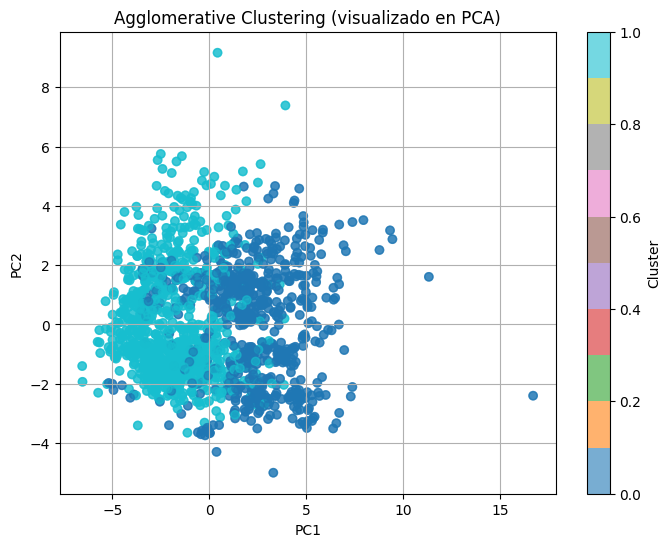

Silhouette Score (Agglomerative): 0.10686788290857735
Davies-Bouldin Score (Agglomerative): 2.8154467035023765


In [ ]:
agglo = AgglomerativeClustering(n_clusters=2)  
labels_agglo = agglo.fit_predict(X_processed)

# Visualizar
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agglo, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering (visualizado en PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

sil_score_agg_nopca = silhouette_score(X_processed, labels_agglo)
db_score_agg_npca = davies_bouldin_score(X_processed, labels_agglo)

print("Silhouette Score (Agglomerative):", sil_score_agg_nopca)
print("Davies-Bouldin Score (Agglomerative):", db_score_agg_npca)

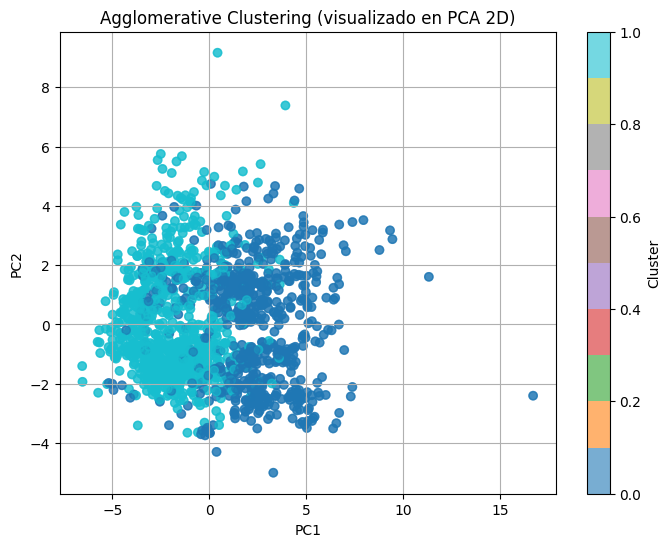

Silhouette Score (Agglomerative): 0.13397083780497104
Davies-Bouldin Score (Agglomerative): 2.5034258557204194


In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=2)
labels_agg = agg_clust.fit_predict(X_reduced)  # Usar los datos reducidos por PCA

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_agg, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering (visualizado en PCA 2D)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

sil_score_agg = silhouette_score(X_reduced, labels_agg)
db_score_agg = davies_bouldin_score(X_reduced, labels_agg)

print("Silhouette Score (Agglomerative):", sil_score_agg)
print("Davies-Bouldin Score (Agglomerative):", db_score_agg)

# Resultado

Las métricas de los modelos no parecen muy buenas, esto puede ser por naturaleza o seleccion de los datos. Dentro del proceso, se intentó trabajar solo con los datos del train y también solo con númericas. Esta ultima no tuvo impacto. Dados los resultados actuales teniendo en cuenta variables numericas y categoricas, y segun metricas, vamos a usar PCA en KMeans

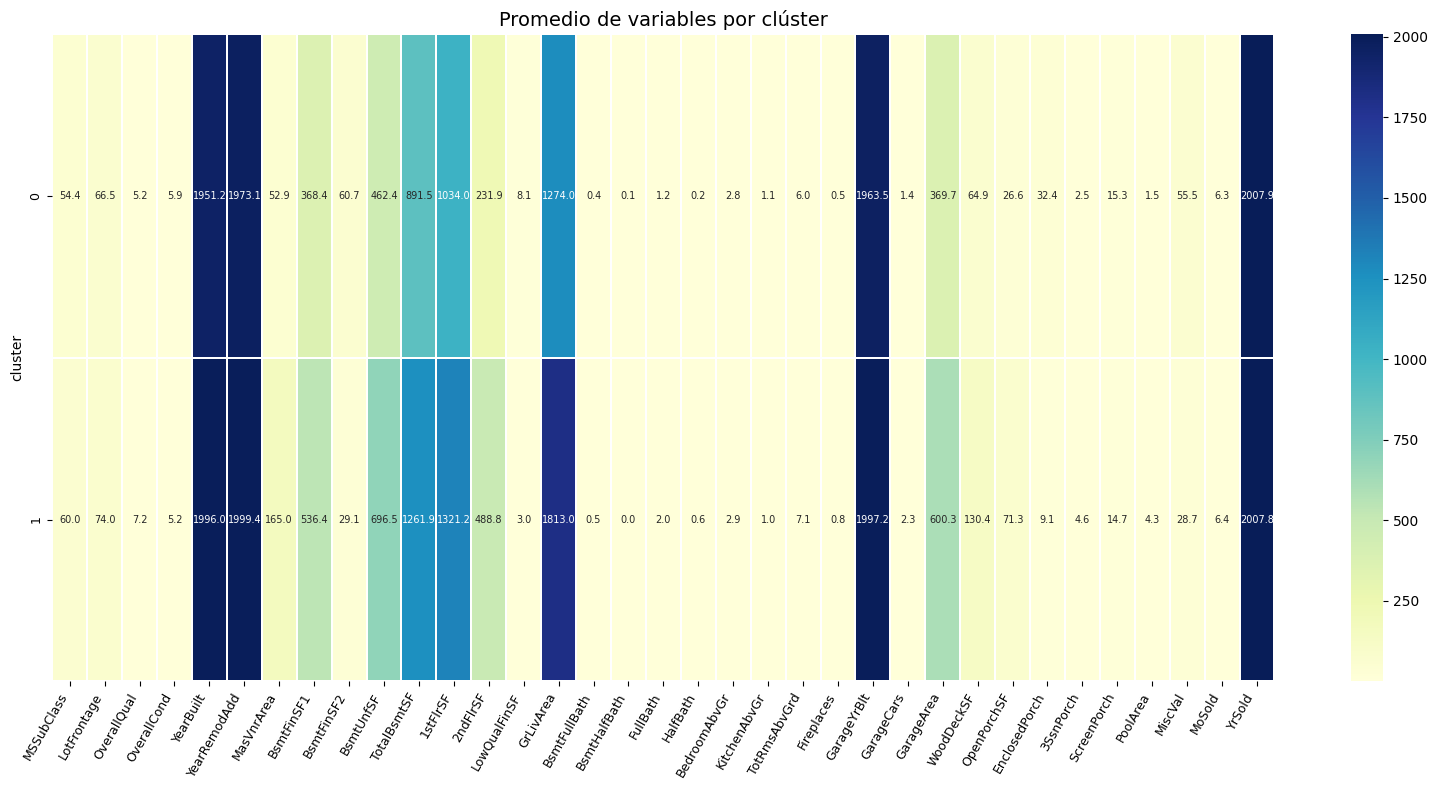

In [ ]:
df_clustered = df_train.copy()
df_clustered['cluster'] = labels_kmeans

cluster_summary = df_clustered.groupby('cluster')[numeric_cols].mean().round(2)

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_summary, 
            annot=True, 
            fmt=".1f", 
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 7})  
plt.title("Promedio de variables por clúster", fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

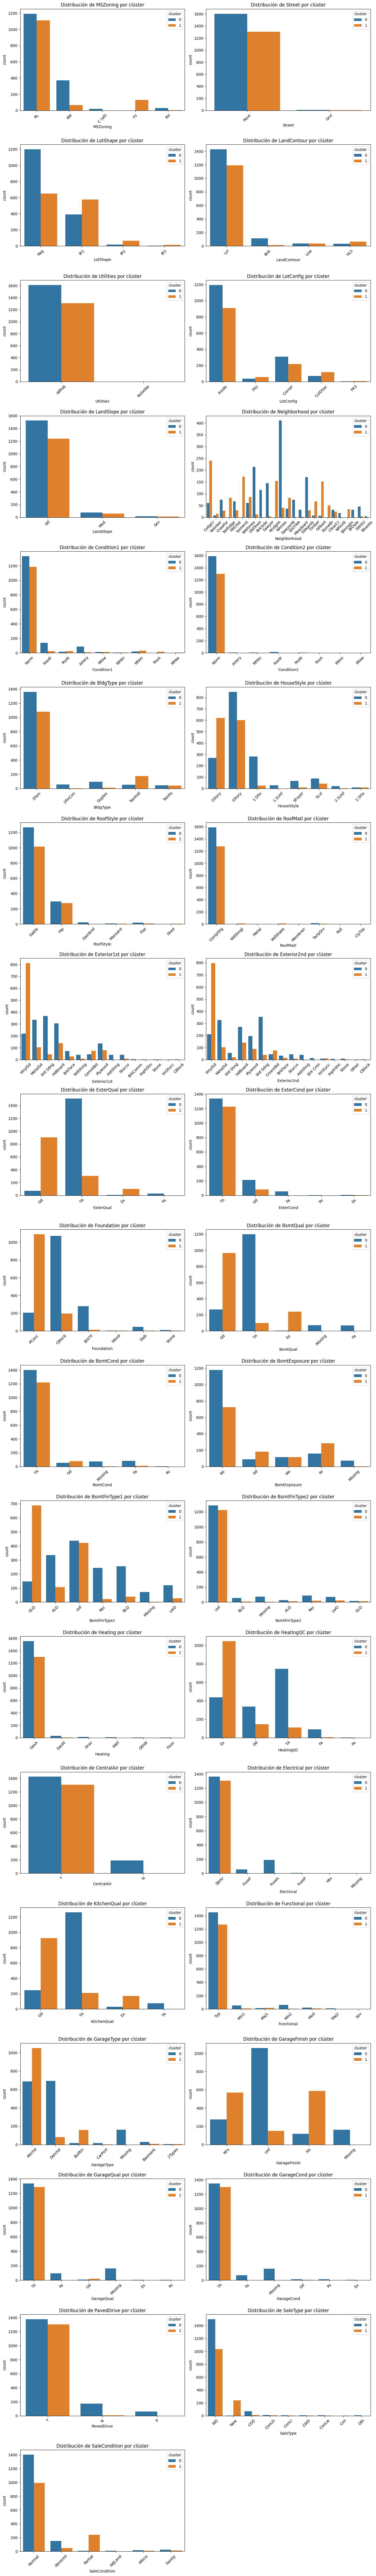

In [ ]:
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

# Gráfico por cada variable categórica
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_clustered, x=col, hue='cluster', ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por clúster')
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**¿Qué variables parecen diferenciar más a los grupos?**
En una primera version, la clusterizacion estaba demasiado concentrada en LotArea, variable que podia ser sesgo. Esta fue eliminada para ver si los modelos usaban más variables para diferenciarse y funcionó. Asi que ahora esta mas balanceado

**¿Qué utilidad podría tener este análisis para un negocio o investigación?** Una segmentacion de propiedades podria usarse como variable a la hora de valorizarlas, o para definir qué hace que pertenezca a ese grupo

**¿Qué limitaciones tiene este enfoque frente al aprendizaje supervisado?** No tiene una “verdad” objetiva: no hay etiquetas, así que no se puede medir si los clústeres son ‘correctos’ y subjetividad en la interpretación(la elección de k, de la métrica o del algoritmo puede influir mucho en los resultados)

 **¿Qué podrías mejorar en un segundo intento?** Podria intentar armar variables, reducir algunas categóricas. Pero en general siento que el dataset no estaba muy inclinado a este tipo de modelos

**¿Cómo determinaste el número de clústeres óptimo?** Usando el metodo del codo, y en otros modelos hice cambios en los parametros para ver como se iban ajustando los datos

**¿Qué técnica funcionó mejor y por qué?** La mejor tecnica fue Kmeans con PCA, fue la de mejores métricas de evaluacion aunque no hayan sido muy buenas

**¿Pudiste observar algún patrón inesperado?** La inclinacion por LotArea para segmentar 

**¿Cómo podrían usarse estos grupos en un modelo supervisado posterior?** Yo usaria estos resultados para un analisis de drivers (clasificacion binaria) y determinar la influencia positiva o negativa de las variables, y que features hacen que una propiedad pertenezca a un segmento